In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [2]:
#Keeping the random data the same over multiple runs of the code.
np.random.seed(42)

#Storing our randomly generated data and labels.
data = []
groups = []
labels_var = []
labels_size = []

#The values we use for the standard deviations and the sample sizes.
variability = [5, 20, 50]
sizes = [10, 100, 10000]

#Generating data for each group for each combination of variability and sample size.
# ???? Could you describe these script inside for???
for var in variability:
    for size in sizes:
        print(data.extend(np.random.normal(20,var,size)))# make random number equal to size with each variability(var) and mean 20
        print(data.extend(np.random.normal(35,var,size)))
        print(labels_var.extend([var]*size*2))# *2: because two series number
        print(labels_size.extend([size]*size*2))
        print(groups.extend(['group1']*size))
        print(groups.extend(['group2']*size)) 
        


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [3]:
#Putting the data together in a data frame and checking it.

data = pd.DataFrame({'data': data, 
                     'groups' : groups,
                    'variability':labels_var,
                    'size':labels_size})
print(data.head())
len(data)

        data  groups  variability  size
0  22.483571  group1            5    10
1  19.308678  group1            5    10
2  23.238443  group1            5    10
3  27.615149  group1            5    10
4  18.829233  group1            5    10


60660

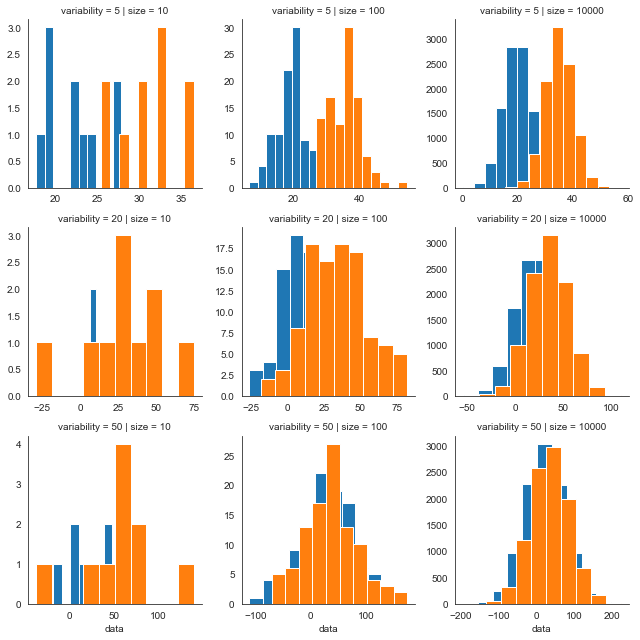

In [4]:
# Plotting the data.  
# Because we organized the data frame in a stacked (long) format, the plotting code is very straightforward.
sns.set_style('white')

g = sns.FacetGrid(data, col="size", row="variability", hue='groups', sharex=False, sharey=False)
g.map(plt.hist,'data')
plt.show()

In [7]:
# Setting the three non-data columns to work as multi-indices. 
# This makes it much easier to get subsections of stacked data.

data_test = data.set_index(['groups','size','variability'])
#print(data_test)
# Storing our t-values and p-values (we'll get to p-values in a sec).
tvalues=[]
pvalues=[]

#For each combination of sample size and variability, compare the two groups using a t-test
#???? 
for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))#xs: cross section on the rows
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        print(a)
        print(b)
        tval,pval=stats.ttest_ind(b, a,equal_var=True)
        print(tvalues.append(tval))
        print(pvalues.append(pval))

# a is the number for each size and var The numbers are driven randomly from a dist
# Then b is drawn from the same dist but would be different numbers As it’s random drawing
# Now df.col.xs a way of getting data from different level


groups  size  variability
group1  10    5              22.483571
              5              19.308678
              5              23.238443
              5              27.615149
              5              18.829233
              5              18.829315
              5              27.896064
              5              23.837174
              5              17.652628
              5              22.712800
Name: data, dtype: float64
groups  size  variability
group1  10    20             49.250608
              20             15.209011
              20             35.984054
              20             27.277827
              20             20.148743
              20             24.085099
              20              6.239824
              20             13.878012
              20              8.387294
              20             38.027534
Name: data, dtype: float64
groups  size  variability
group1  10    50             60.688649
              50             32.562913
          

10000

In [ ]:
#Creating a data frame for plotting purposes.
tvalues_plot=pd.DataFrame({'t':tvalues,
                           'p':pvalues,
                          'variability':variability*3,
                          'size':np.repeat(sizes,3)})
print(tvalues_plot)
# t-values by variability
ax = sns.barplot(y='t',x='variability',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

# t-values by sample size
ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()